In [0]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [0]:
df = sio.loadmat('/content/background_removal.mat')
X = df['image_array']

In [5]:
X.shape

(120, 180, 500)

Text(0.5, 1.0, 'Image 1')

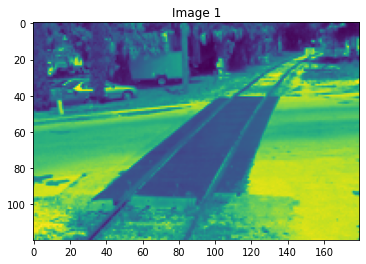

In [6]:
## plot image 1 and image 350
plt.imshow(X[:,:,0])
plt.title("Image 1")

Text(0.5, 1.0, 'Image 350')

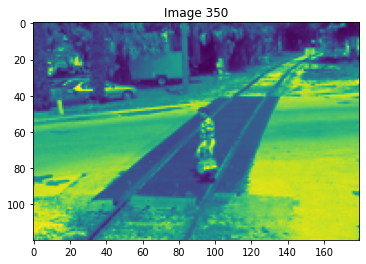

In [7]:
#Plot image 350
plt.imshow(X[:, :, 349])
plt.title("Image 350")

In [9]:
# reform image into a matrix 
X_reform = X.reshape((X.shape[0]*X.shape[1], X.shape[2]))
X_reform.shape

(21600, 500)

In [0]:
#Initialize S, Y, mu 
S = np.zeros((X_reform.shape[0], X_reform.shape[1]))
Y = np.zeros((X_reform.shape[0], X_reform.shape[1]))
M = X_reform
mu = 0.88
lambda_ = 0.0068

In [0]:
for i in range(0, 500):
  ## Update L
  sum_matrix = M-S-Y/mu
  u,s,v = np.linalg.svd(sum_matrix, full_matrices=False)
  S_mu = np.where((np.abs(s) - mu) < 0, 0, (np.abs(s) - mu))
  S_mu_prime = np.multiply(np.sign(s), S_mu)
  L = np.dot(u * S_mu_prime, v)

  ##Update S
  sum_2 = M - L - Y/mu
  sum_2_shrink = np.where((np.abs(sum_2)-mu *lambda_) < 0, 0,(np.abs(sum_2)-mu *lambda_))
  S = np.multiply(np.sign(sum_2), sum_2_shrink)

  ##Updating Y
  Y = Y + mu *(M - L -S)
  

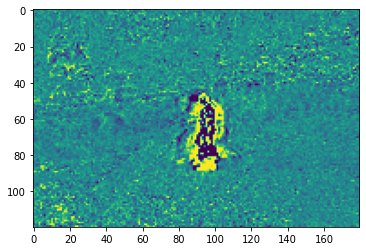

In [67]:
#Image 350 foreground
foreground = L[:, 349].reshape((120,180))
plt.imshow(foreground)

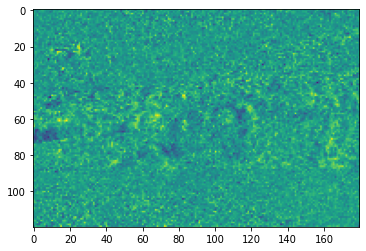

In [68]:
#Image 350 background
background = S[:, 349].reshape((120,180))
plt.imshow(background)

In [0]:
l1_M = np.linalg.norm(M, ord = 1)

In [0]:
## Choosen mu and lambda_ based on articles
m = 21600*500/(4*l1_M)

In [0]:
l = 1/np.sqrt(21600)